# 1. Analyzing MBTI Distribution Across Different Brands

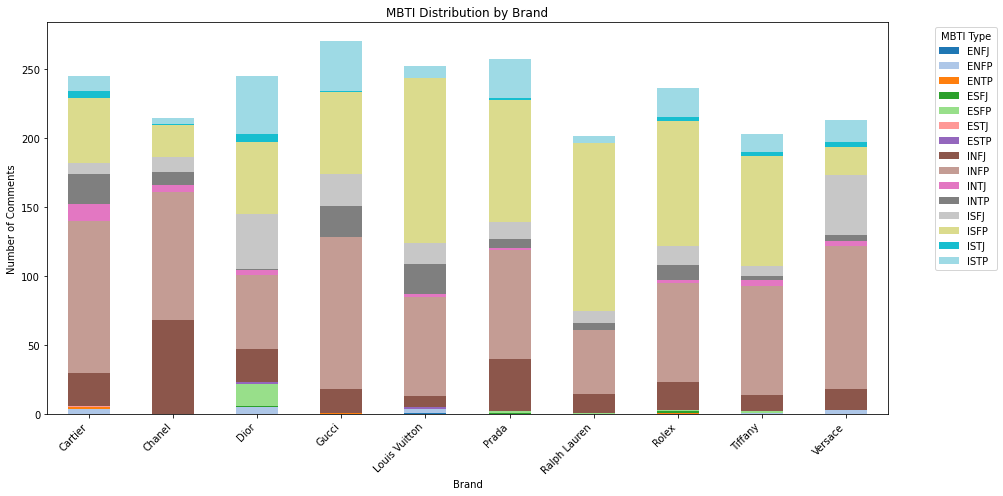

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/final_dataset.csv')
#group by brand and MBTI type, and calculate the count for each combination,reef:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
brand_mbti_distribution = data.groupby(['brand', 'MBTI_Final']).size().unstack()

#plot the MBTI distribution bar chart for each brand
brand_mbti_distribution.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('MBTI Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Simultaneously review the MBTI distribution to assess whether my optimized model shows significant improvement.

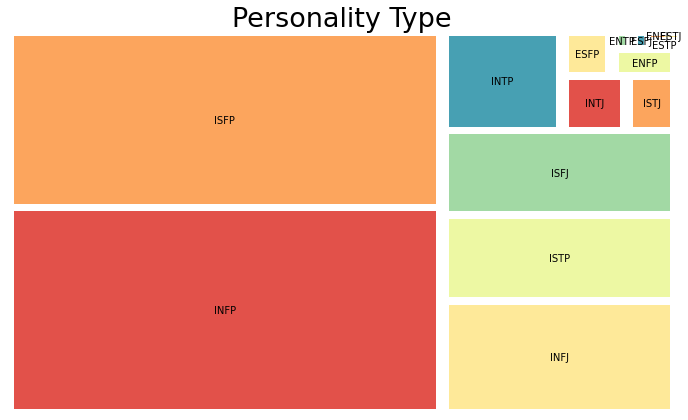

In [23]:
import squarify

#calculate the distribution of MBTI types
count = dict(data['MBTI_Final'].value_counts())  

#generate a treemap
plt.figure(figsize=(12, 7))
squarify.plot(sizes=count.values(), color=sns.color_palette("Spectral"), pad=2, label=count.keys())
plt.title('Personality Type', fontsize=27)
plt.axis('off')
plt.show()

# 2. Social Network Analysis

I used the NetworkX library to create a basic social network graph and generate interactive visualizations with Pyvis, enabling a deeper exploration of network connections. For reference, I followed the [Pyvis tutorial](https://pyvis.readthedocs.io/en/latest/tutorial.html).

In [25]:
from pyvis.network import Network
import networkx as nx

#load the dataset
data_path = 'data/final_dataset.csv'
data = pd.read_csv(data_path)
#build the NetworkX graph object
G = nx.Graph()

#iterate over each row in the dataset, adding brand and MBTI type as nodes and creating edges
#ref:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
for _, row in data.iterrows():
    brand = row['brand']
    mbti = row['MBTI_Final']
    #add MBTI type and brand nodes
    G.add_node(mbti, title=mbti)
    G.add_node(brand, title=brand)
    #create edge between MBTI type and brand
    G.add_edge(mbti, brand)

#use pyvis to create a dynamic network
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
#load data from the NetworkX graph
net.from_nx(G)
#set colors for MBTI types and use gray for brand nodes, adjust node sizes
mbti_colors = {'ENFJ': '#FF6347','ENFP': '#4682B4',  'ENTP': '#32CD32',  'ESFJ': '#FFD700',  'ESFP': '#8A2BE2',  'ESTJ': '#FF4500', 'ESTP': '#DA70D6', 'INFJ': '#5F9EA0', 'INFP': '#7FFF00', 'INTJ': '#FF1493',  'INTP': '#00FA9A',  'ISFJ': '#D2691E',  'ISFP': '#6495ED',  'ISTJ': '#FF69B4',  'ISTP': '#BA55D3'  }

for node in net.nodes:
    if node['id'] in mbti_colors:
        node['color'] = mbti_colors[node['id']]
        # MBTI nodes have a standard size
        node['size'] = 8
    else:
        #brand nodes are black
        node['color'] = 'gray'
        #reduce size for brand nodes 
        node['size'] = 2  

#generate the HTML file,ref:https://python-textbook.pythonhumanities.com/06_sna/06_01_08_applied2.html
net.write_html('mbti_brand_network.html')

# 2. Sentiment Analysis

I perform a straightforward sentiment analysis on text data. The results can be visualized using interactive histograms in Plotly, and more detailed comparisons can be made across different MBTI types using Seaborn and Matplotlib.

For further details, refer to the [Plotly Histogram Documentation](https://plotly.com/python/histograms/) and the [TextBlob Documentation](https://textblob.readthedocs.io/en/dev/).


In [26]:
import pandas as pd
import plotly.express as px
from textblob import TextBlob

#ensure all text data is a string, and replace NaN values with empty strings
data['cleaned_text'] = data['cleaned_text'].fillna('').astype(str)
#perform sentiment analysis using TextBlob
data['sentiment'] = data['cleaned_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

#create an interactive histogram using Plotly
fig = px.histogram(data, x='sentiment', nbins=50, title='Sentiment Distribution',labels={'sentiment': 'Sentiment Polarity'},color_discrete_sequence=['blue'])
#update layout for better visualization
fig.update_layout(xaxis_title='Sentiment Polarity',yaxis_title='Number of Comments',bargap=0.1)
fig.show()


Then I provide a detailed analysis of the relationship between MBTI types and sentiment polarity, visualizing both the average sentiment for each MBTI type and the distribution of positive, neutral, and negative sentiments across different types.

<ipython-input-27-584218dd2eb3>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




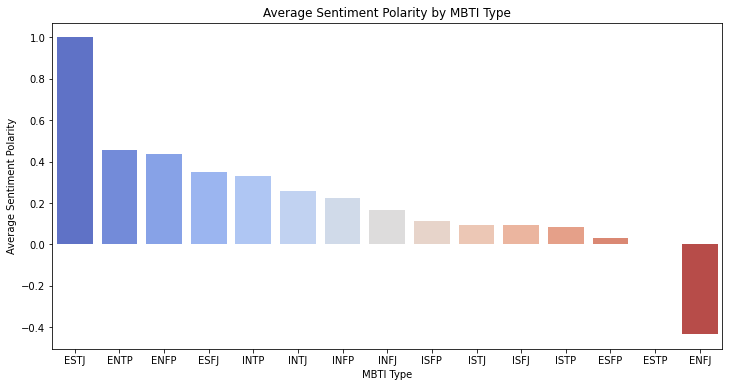

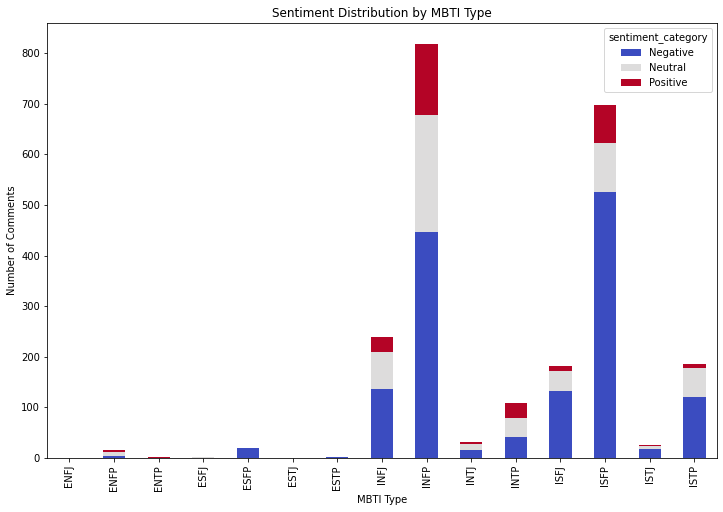

In [27]:
#calculate the average sentiment polarity for each MBTI type
mbti_sentiment = data.groupby('MBTI_Final')['sentiment'].mean().sort_values(ascending=False).reset_index()

#plot a bar chart showing the average sentiment polarity by MBTI type
plt.figure(figsize=(12, 6))
sns.barplot(x='MBTI_Final', y='sentiment', data=mbti_sentiment, palette='coolwarm')
plt.title('Average Sentiment Polarity by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Average Sentiment Polarity')
plt.show()

#categorize sentiment polarity into three classes: Negative (<0), Neutral (=0), Positive (>0),ref:https://machinelearningtutorials.org/pandas-cut-function-binning-and-grouping-data-with-examples/
data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, 0, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])
#create a crosstab and plot a stacked bar chart to show sentiment distribution by MBTI type,ref:https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(data['MBTI_Final'], data['sentiment_category']).plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Sentiment Distribution by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Number of Comments')
plt.show()

### Add sentiment analysis into the network

In [41]:
#load dataset and ensure text data is processed
data_path = 'data/final_dataset.csv'
data = pd.read_csv(data_path)
data['cleaned_text'] = data['cleaned_text'].fillna('').astype(str)

#perform sentiment analysis and categorize sentiment,ref:# Ref: https://textblob.readthedocs.io/en/dev/
data['sentiment'] = data['cleaned_text'].apply(lambda text: TextBlob(text).sentiment.polarity)
data['sentiment_category'] = data['sentiment'].apply(lambda polarity: 'Positive' if polarity > 0 else 'Negative' if polarity < 0 else 'Neutral')

#build a NetworkX graph object
G = nx.Graph()
#add nodes and edges for MBTI types and brands
for _, row in data.iterrows():
    G.add_node(row['MBTI_Final'], title=f"{row['MBTI_Final']} ({row['sentiment_category']})")
    G.add_node(row['brand'], title=row['brand'])
    G.add_edge(row['MBTI_Final'], row['brand'])

#visualize with Pyvis,ref:# Ref: https://pyvis.readthedocs.io/en/latest/tutorial.html
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
net.from_nx(G)
#set colors for MBTI types and use gray for brand nodes, adjust node sizes
mbti_colors = {'ENFJ': '#FF6347','ENFP': '#4682B4',  'ENTP': '#32CD32',  'ESFJ': '#FFD700',  'ESFP': '#8A2BE2',  'ESTJ': '#FF4500', 'ESTP': '#DA70D6', 'INFJ': '#5F9EA0', 'INFP': '#7FFF00', 'INTJ': '#FF1493',  'INTP': '#00FA9A',  'ISFJ': '#D2691E',  'ISFP': '#6495ED',  'ISTJ': '#FF69B4',  'ISTP': '#BA55D3'  }

#set colors and sizes for nodes
for node in net.nodes:
    if node['id'] in mbti_colors:
        node['color'] = mbti_colors[node['id']]
        node['size'] = data[data['MBTI_Final'] == node['id']]['sentiment'].mean() * 10+10
    else:
        node.update({'color': 'grey', 'shape': 'dot', 'size': 2})

#save the network visualization
net.write_html('mbti_brand_sentiment_network.html')

# 3. LDA Topic Analysis

This code extracts topics from text data using LDA and visualizes the distribution of different topics across the documents.


Topic 0: dior nbcolympics outfit_luxy teamusa paralympics paris2024 best rihanna stunning let
Topic 1: rolex vuitton louis f1 pretty pair style going come usopen
Topic 2: prada gucci aespa_official karina billkin_ent louisvuitton felix ambassador global bbillkin
Topic 3: chanel beautiful newjeans_ador thewatchb gulfkanawut dior gucci ralphlauren jisoo f4shionall
Topic 4: versace pradaxbby tiffanyandco ningning tawattannn versacefw24 ellementhailand cartier fourthnattawat ningningxversacekleio


<ipython-input-42-09fba0023fdb>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




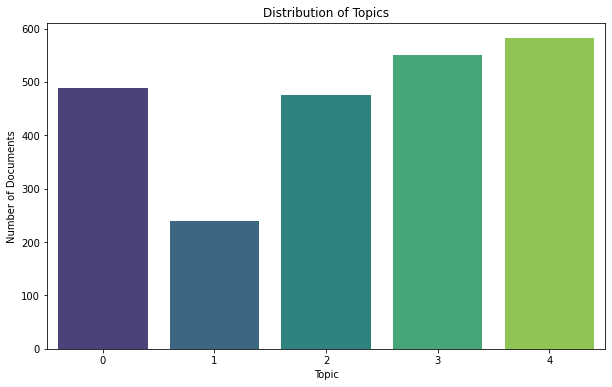

In [42]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

#load and preprocess the dataset
data_path = 'data/predictions.csv'
data = pd.read_csv(data_path)
data = data.dropna(subset=['cleaned_text'])

#convert text data to vectors,ref:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
#convert the cleaned text data into a matrix of TF-IDF features
X = vectorizer.fit_transform(data['cleaned_text'])

#set LDA topics number
n_topics = 5
#perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

#extract keywords for each topic
def display_topics(model, feature_names, n_top_words):
    topics = {}
    #loop through each topic in the model
    for topic_idx, topic in enumerate(model.components_):
        #get the top words for the current topic by sorting the feature importance in descending order
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        #assign the top words to the corresponding topic index
        topics[topic_idx] = top_words
    return topics

#set the number of top words 
n_top_words = 10
#get the feature names from the TF-IDF vectorizer
tf_feature_names = vectorizer.get_feature_names_out()
#extract the top keywords for each topic using the LDA model
topics = display_topics(lda, tf_feature_names, n_top_words)

#display the keywords for each topic
for topic, keywords in topics.items():
    print(f"Topic {topic}: {' '.join(keywords)}")

#assign the most relevant topic to each document,ref:https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
data['topic'] = lda.transform(X).argmax(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='topic', palette='viridis')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.show()